In [ ]:
!pip install nltk
!pip install spacy
!pip install wordcloud
!pip install -U textblob

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
data = pd.read_csv("C:/Users/krishna/Downloads/Elon_musk.csv",encoding = "ISO-8859-1")
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
data.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [7]:
#droping Unnamed Column
data=data.drop(['Unnamed: 0'],axis=1)

In [8]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
import re
# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text
# Clean The Text
data["Text"] = data["Text"].apply(cleantext)
data.head(10)

,Text
0,Im an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
5,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would..."
7,_ Haha thanks :)
8,Indeed! Tweets definitely do not represent r...
9,The most entertaining outcome is the most likely


textblob is a popular library for text analysis. When used to evaluate the sentiment of a text, it will output 
two values: subjectivity and polarity.

The polarity is a value ranging between -1 and 1, with -1 being very negative and +1 very positive. 
The subjectivity ranges between 0 and 1, and refers to the person’s opinion, emotion, 
or even judgment. The higher the number, the more subjective the text is.

In [10]:
from textblob import TextBlob

In [11]:
# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
# Adding Subjectivity & Polarity
data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)
data

,Text,subjectivity,polarity
0,Im an alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


# Word Cloud

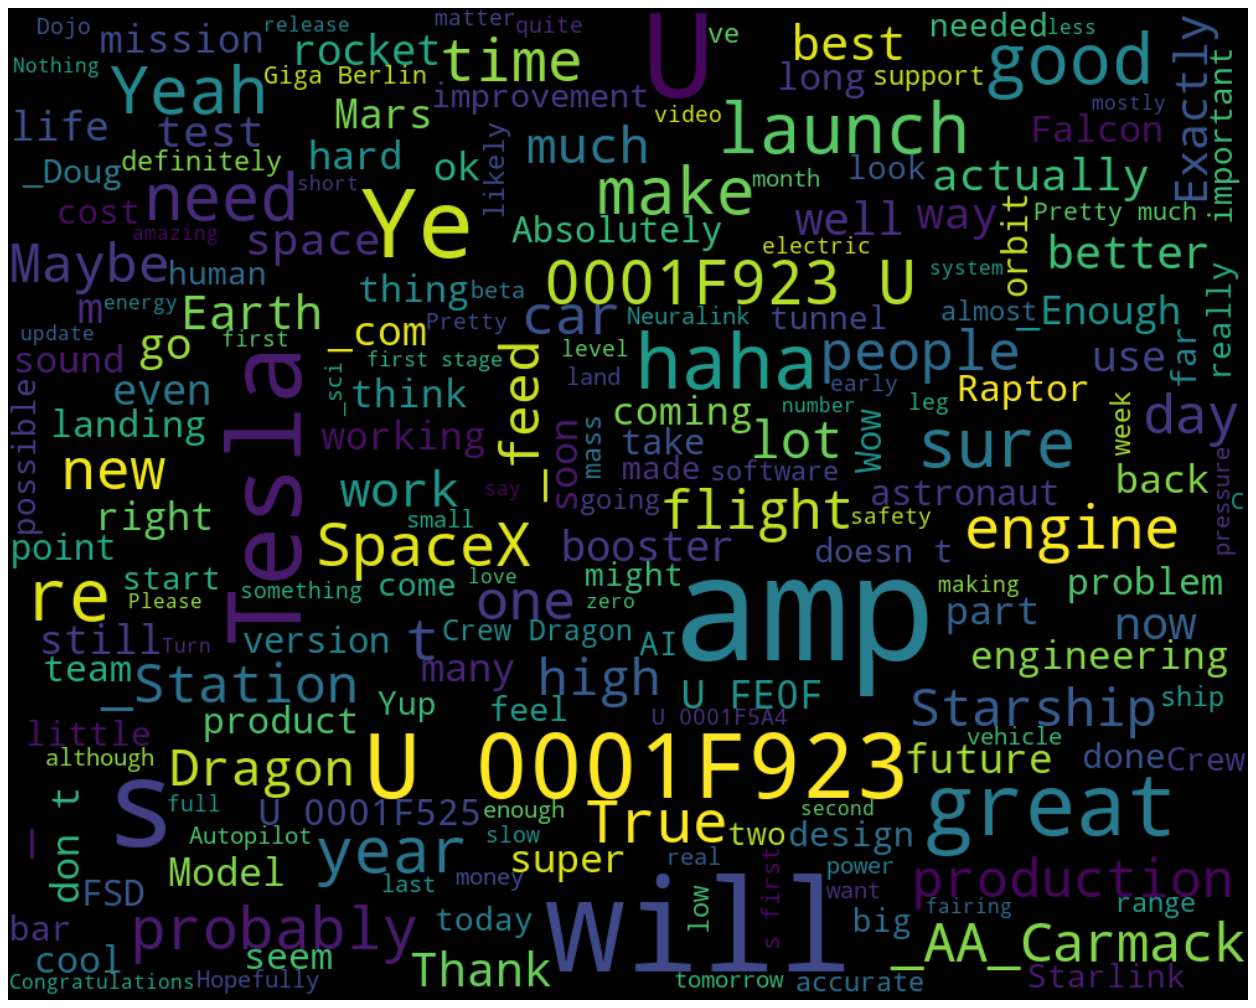

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in data["Text"]])
wordCloud = WordCloud(width = 1000, height = 800, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [15]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
data["analysis"] = data["polarity"].apply(analysis)
# Print The Data
data

,Text,subjectivity,polarity,analysis
0,Im an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


extract some positive and negative tweets with the full text to see what they are all about

In [16]:
positive_tweets = data[data['analysis'] == 'Positive']
negative_tweets = data[data['analysis'] == 'Negative']
print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])
print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])

positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 - Im an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.


# we will plot all the tweets using a scatter plot with subjectivity and polarity at the axis

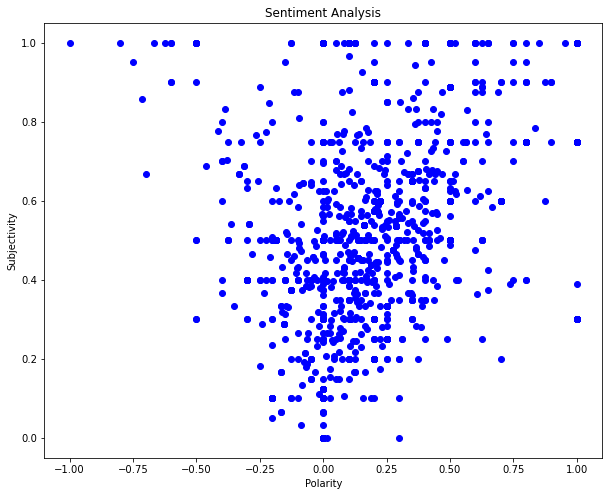

In [17]:
plt.figure(figsize=(10, 8))
for i in range(0, data.shape[0]):
    plt.scatter(data["polarity"][i], data["subjectivity"][i], color = "Blue")
plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [18]:
#ratio of positive over negative tweets
len(positive_tweets) / len(negative_tweets)

4.036529680365297

# Extract Amazon review

In [19]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [20]:
#creating an empty review list
redmi_reviews = []

for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/Test-Exclusive_2020_1159-Multi-3GB-Storage/product-reviews/B089MVC43X/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    redmi_reviews = redmi_reviews+ip

In [21]:
##Writing reviews in a text file
with open("redmi.txt","w",encoding = 'utf-8') as output:
    output.write(str(redmi_reviews))
    
import os
os.getcwd()
## Joining all the reviews into single paragraph
red_rev_string = " ".join(redmi_reviews)

In [22]:
##Removing unwanted symbols in case present
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [23]:
##Splitting each word with space -- Tokanization
red_rev_words = red_rev_string.split(" ")

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

red_rev_words = [w for w in red_rev_words if not w in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
## Joining all the reviews into single paragraph
red_rev_string =" ".join(red_rev_words)

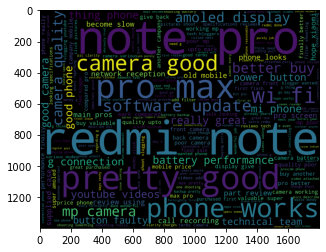

In [25]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

plt.imshow(wordcloud_ip)

In [26]:
# positive words
# Choose the path for +ve words stored in system
with open("C:/Users/krishna/Downloads/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

poswords = poswords[36:]
poswords

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordabl

In [29]:
# negative words  Choose path for -ve words stored in system
with open("C:/Users/krishna/Downloads/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")
  
negwords =negwords[37:]
negwords

['abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',

In [30]:
##Negative word cloud word cloud
##taking those words from the words which are present in the negative words

red_neg_= ' '.join([w for w in red_rev_words if w in negwords])

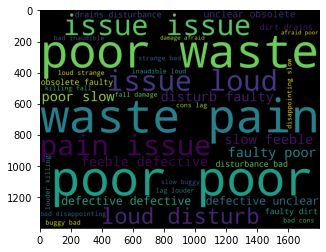

In [31]:
##Negative word cloud
wordcloud_neg= WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_neg_)

plt.imshow(wordcloud_neg)

In [32]:
##Considering only the words which are present in the positive words

red_pos = " ".join([w for w in red_rev_words if w in poswords])

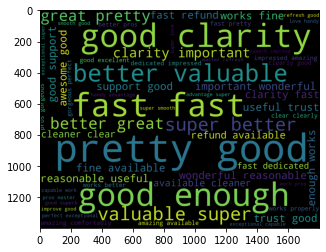

In [33]:
##Building Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

plt.imshow(wordcloud_pos)


In [34]:
##Unique words
red_unique = list(set(" ".join(redmi_reviews).split(" ")))
red_unique

['',
 'connection',
 'Pros:1)',
 '"MI"',
 'me',
 'Amoled',
 'Cleaner',
 'uses',
 'gaming',
 'is..',
 'old',
 '(the',
 'our',
 'making',
 'your',
 'visible',
 'every',
 'screen,',
 'fall',
 'disappointing',
 'fixes',
 'useful',
 'mobile',
 '"techy',
 'expert',
 'AMOLED',
 'faulty...',
 'great',
 "can't",
 'few',
 'call',
 'update',
 'screen',
 'that,',
 '..Redmi',
 'premium',
 'on',
 'Vlogging',
 'appNo',
 'poor',
 'Buying',
 'shooting.The',
 'amazing',
 'able',
 'create',
 'switch',
 'anyone',
 'dirt',
 'Mobile',
 'blogger',
 'cost.I',
 'Have',
 'release.\n\n',
 'via',
 'Slim',
 '1.6',
 'compared',
 'food',
 'short',
 'far',
 'speaker',
 'looking',
 '7/10,front',
 'now',
 'unlock',
 'one',
 'told',
 'we',
 'held',
 'there',
 'regular',
 'Notch',
 'damage',
 'team',
 'case.',
 'replacement',
 'Also',
 'Hardware',
 'capable',
 'press',
 'advertised.',
 'I',
 'price,',
 'too',
 'Processor',
 'like',
 'things',
 'matter',
 ':Main',
 'Redmi',
 'job',
 'saying',
 'screen.',
 'month',
 'phone